In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import statsmodels as stats
from scipy import stats
import pandas as pd
import os
import numpy as np
import re 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/최종_전처리.csv',encoding='utf-8',index_col=0)

In [49]:
df

,GYEAR,MONTH,PCODE,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG,BARREL,BARREL_SUM,희생플라이,OBP,SLG,OPS,GAMENUM,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,3,60100,12,10,0,0,0,0,0,0,0,0,2,0,2,1,0.000000,0.200000,1,0.0,0.166667,0.000000,0.166667,70.0,백창수,0.0,1.0,30.0,5000.0
1,2018,3,60343,5,5,2,2,0,0,1,4,0,0,0,0,1,0,0.400000,0.500000,2,0.0,0.400000,1.000000,1.400000,83.0,이해창,2.0,3.0,31.0,7100.0
2,2018,3,60558,18,16,4,4,1,0,1,3,0,0,2,0,2,0,0.250000,0.250000,3,0.0,0.333333,0.500000,0.833333,128.0,오태곤,2.0,0.0,26.0,8300.0
3,2018,3,60566,12,12,1,6,1,0,0,2,0,1,0,0,0,0,0.083333,0.090909,1,0.0,0.500000,0.583333,1.083333,114.0,이상호,5.0,0.0,29.0,8000.0
4,2018,3,61102,20,19,3,6,0,0,1,3,0,0,0,1,3,2,0.157895,0.071429,1,0.0,0.350000,0.473684,0.823684,132.0,유강남,3.0,3.0,25.0,18500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,2021,7,79240,23,23,2,11,4,0,0,2,0,0,0,0,1,0,0.086957,0.050000,1,0.0,0.478261,0.652174,1.130435,69.0,허경민,6.0,0.0,30.0,100000.0
4609,2021,7,79365,26,23,5,7,1,0,3,13,0,0,2,1,8,0,0.217391,0.142857,2,0.0,0.384615,0.739130,1.123746,73.0,박동원,9.0,3.0,31.0,23000.0
4610,2021,7,79402,10,10,1,2,0,0,1,1,0,0,0,0,0,0,0.100000,0.000000,0,0.0,0.200000,0.500000,0.700000,70.0,김상수,8.0,0.0,31.0,25000.0
4611,2021,7,79456,9,9,2,3,0,0,0,0,0,0,0,0,2,0,0.222222,0.000000,0,0.0,0.333333,0.333333,0.666667,62.0,이지영,9.0,3.0,35.0,30000.0


In [50]:
df.drop('NAME',axis=1, inplace=True)

In [51]:
df =df.drop('희생플라이',axis=1)
df

,GYEAR,MONTH,PCODE,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG,BARREL,BARREL_SUM,OBP,SLG,OPS,GAMENUM,T_ID,POSITION,AGE_VA,MONEY
0,2018,3,60100,12,10,0,0,0,0,0,0,0,0,2,0,2,1,0.000000,0.200000,1,0.166667,0.000000,0.166667,70.0,0.0,1.0,30.0,5000.0
1,2018,3,60343,5,5,2,2,0,0,1,4,0,0,0,0,1,0,0.400000,0.500000,2,0.400000,1.000000,1.400000,83.0,2.0,3.0,31.0,7100.0
2,2018,3,60558,18,16,4,4,1,0,1,3,0,0,2,0,2,0,0.250000,0.250000,3,0.333333,0.500000,0.833333,128.0,2.0,0.0,26.0,8300.0
3,2018,3,60566,12,12,1,6,1,0,0,2,0,1,0,0,0,0,0.083333,0.090909,1,0.500000,0.583333,1.083333,114.0,5.0,0.0,29.0,8000.0
4,2018,3,61102,20,19,3,6,0,0,1,3,0,0,0,1,3,2,0.157895,0.071429,1,0.350000,0.473684,0.823684,132.0,3.0,3.0,25.0,18500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,2021,7,79240,23,23,2,11,4,0,0,2,0,0,0,0,1,0,0.086957,0.050000,1,0.478261,0.652174,1.130435,69.0,6.0,0.0,30.0,100000.0
4609,2021,7,79365,26,23,5,7,1,0,3,13,0,0,2,1,8,0,0.217391,0.142857,2,0.384615,0.739130,1.123746,73.0,9.0,3.0,31.0,23000.0
4610,2021,7,79402,10,10,1,2,0,0,1,1,0,0,0,0,0,0,0.100000,0.000000,0,0.200000,0.500000,0.700000,70.0,8.0,0.0,31.0,25000.0
4611,2021,7,79456,9,9,2,3,0,0,0,0,0,0,0,0,2,0,0.222222,0.000000,0,0.333333,0.333333,0.666667,62.0,9.0,3.0,35.0,30000.0


In [6]:
pcode_list = df['PCODE'].unique().tolist()
pcode_list

[60100,
 60343,
 60558,
 60566,
 61102,
 61186,
 61197,
 61208,
 61353,
 61404,
 61869,
 62332,
 62404,
 62415,
 62556,
 62700,
 62797,
 62802,
 62864,
 62884,
 62895,
 62907,
 62908,
 62931,
 62934,
 62947,
 63123,
 63202,
 63450,
 63704,
 63722,
 63963,
 64006,
 64153,
 64266,
 64300,
 64346,
 64610,
 64717,
 65115,
 66209,
 66354,
 66462,
 66606,
 66838,
 67025,
 67341,
 67394,
 67450,
 67454,
 67539,
 67598,
 67650,
 67872,
 67935,
 67944,
 68050,
 68103,
 68244,
 68525,
 68730,
 70410,
 70553,
 70756,
 71184,
 71432,
 71552,
 71564,
 71752,
 71842,
 72133,
 72443,
 72466,
 72546,
 73113,
 73209,
 73213,
 73306,
 73339,
 73606,
 74163,
 74206,
 74215,
 74339,
 74465,
 74540,
 74729,
 74823,
 75125,
 75151,
 75334,
 75566,
 75808,
 75847,
 76100,
 76158,
 76232,
 76249,
 76267,
 76290,
 76313,
 76509,
 76720,
 76746,
 76753,
 76802,
 76812,
 76849,
 77248,
 77462,
 77463,
 77532,
 77564,
 78168,
 78217,
 78224,
 78288,
 78513,
 78548,
 78603,
 78629,
 78643,
 78756,
 78813,
 79109,


In [7]:
def first_(a):
  if a in df_sel['MONTH'].tolist() :
    ser_sel = df_sel[df_sel['MONTH']==a]
    df_new.loc[len(df_new),'PCODE'] = ser_sel.iloc[0,2]
    df_new.loc[len(df_new)-1,'GYEAR'] = ser_sel.iloc[0,0]
    df_new.loc[len(df_new)-1,'GAMENUM'] = ser_sel.iloc[0,-5]
    df_new.loc[len(df_new)-1,'T_ID'] = ser_sel.iloc[0,-4]
    df_new.loc[len(df_new)-1,'POSITION'] = ser_sel.iloc[0,-3]
    df_new.loc[len(df_new)-1,'AGE_VA'] = ser_sel.iloc[0,-2]
    df_new.loc[len(df_new)-1,'MONEY'] = ser_sel.iloc[0,-1]
    df_new.loc[len(df_new)-1,'PA_1'] = ser_sel.iloc[0,3]
    df_new.loc[len(df_new)-1,'AB_1'] = ser_sel.iloc[0,4]
    df_new.loc[len(df_new)-1,'R_1'] = ser_sel.iloc[0,5]
    df_new.loc[len(df_new)-1,'H_1'] = ser_sel.iloc[0,6]
    df_new.loc[len(df_new)-1,'2B_1'] = ser_sel.iloc[0,7]
    df_new.loc[len(df_new)-1,'3B_1'] = ser_sel.iloc[0,8]
    df_new.loc[len(df_new)-1,'HR_1'] = ser_sel.iloc[0,9]
    df_new.loc[len(df_new)-1,'RBI_1'] = ser_sel.iloc[0,10]
    df_new.loc[len(df_new)-1,'SB_1'] = ser_sel.iloc[0,11]
    df_new.loc[len(df_new)-1,'CS_1'] = ser_sel.iloc[0,12]
    df_new.loc[len(df_new)-1,'BB_1'] = ser_sel.iloc[0,13]
    df_new.loc[len(df_new)-1,'HBP_1'] = ser_sel.iloc[0,14]
    df_new.loc[len(df_new)-1,'SO_1'] = ser_sel.iloc[0,15]
    df_new.loc[len(df_new)-1,'GDP_1'] = ser_sel.iloc[0,16]
    df_new.loc[len(df_new)-1,'AVG_1'] = ser_sel.iloc[0,17]
    df_new.loc[len(df_new)-1,'BARREL_1'] = ser_sel.iloc[0,18]
    df_new.loc[len(df_new)-1,'BARREL_SUM_1'] = ser_sel.iloc[0,19]
    df_new.loc[len(df_new)-1,'OBP_1'] = ser_sel.iloc[0,20]
    df_new.loc[len(df_new)-1,'SLG_1'] = ser_sel.iloc[0,21]
    df_new.loc[len(df_new)-1,'OPS_1'] = ser_sel.iloc[0,22]

In [8]:
def second_(b):
  if b in df_sel['MONTH'].tolist() :
    ser_sel = df_sel[df_sel['MONTH']==b]
    df_new.loc[len(df_new)-1,'PA_2'] = ser_sel.iloc[0,3]
    df_new.loc[len(df_new)-1,'AB_2'] = ser_sel.iloc[0,4]
    df_new.loc[len(df_new)-1,'R_2'] = ser_sel.iloc[0,5]
    df_new.loc[len(df_new)-1,'H_2'] = ser_sel.iloc[0,6]
    df_new.loc[len(df_new)-1,'2B_2'] = ser_sel.iloc[0,7]
    df_new.loc[len(df_new)-1,'3B_2'] = ser_sel.iloc[0,8]
    df_new.loc[len(df_new)-1,'HR_2'] = ser_sel.iloc[0,9]
    df_new.loc[len(df_new)-1,'RBI_2'] = ser_sel.iloc[0,10]
    df_new.loc[len(df_new)-1,'SB_2'] = ser_sel.iloc[0,11]
    df_new.loc[len(df_new)-1,'CS_2'] = ser_sel.iloc[0,12]
    df_new.loc[len(df_new)-1,'BB_2'] = ser_sel.iloc[0,13]
    df_new.loc[len(df_new)-1,'HBP_2'] = ser_sel.iloc[0,14]
    df_new.loc[len(df_new)-1,'SO_2'] = ser_sel.iloc[0,15]
    df_new.loc[len(df_new)-1,'GDP_2'] = ser_sel.iloc[0,16]
    df_new.loc[len(df_new)-1,'AVG_2'] = ser_sel.iloc[0,17]
    df_new.loc[len(df_new)-1,'BARREL_2'] = ser_sel.iloc[0,18]
    df_new.loc[len(df_new)-1,'BARREL_SUM_2'] = ser_sel.iloc[0,19]
    df_new.loc[len(df_new)-1,'OBP_2'] = ser_sel.iloc[0,20]
    df_new.loc[len(df_new)-1,'SLG_2'] = ser_sel.iloc[0,21]
    df_new.loc[len(df_new)-1,'OPS_2'] = ser_sel.iloc[0,22]

In [9]:
def third_(c):
  if c in df_sel['MONTH'].tolist() :
    ser_sel = df_sel[df_sel['MONTH']==c]
    df_new.loc[len(df_new)-1,'PA_3'] = ser_sel.iloc[0,3]
    df_new.loc[len(df_new)-1,'AB_3'] = ser_sel.iloc[0,4]
    df_new.loc[len(df_new)-1,'R_3'] = ser_sel.iloc[0,5]
    df_new.loc[len(df_new)-1,'H_3'] = ser_sel.iloc[0,6]
    df_new.loc[len(df_new)-1,'2B_3'] = ser_sel.iloc[0,7]
    df_new.loc[len(df_new)-1,'3B_3'] = ser_sel.iloc[0,8]
    df_new.loc[len(df_new)-1,'HR_3'] = ser_sel.iloc[0,9]
    df_new.loc[len(df_new)-1,'RBI_3'] = ser_sel.iloc[0,10]
    df_new.loc[len(df_new)-1,'SB_3'] = ser_sel.iloc[0,11]
    df_new.loc[len(df_new)-1,'CS_3'] = ser_sel.iloc[0,12]
    df_new.loc[len(df_new)-1,'BB_3'] = ser_sel.iloc[0,13]
    df_new.loc[len(df_new)-1,'HBP_3'] = ser_sel.iloc[0,14]
    df_new.loc[len(df_new)-1,'SO_3'] = ser_sel.iloc[0,15]
    df_new.loc[len(df_new)-1,'GDP_3'] = ser_sel.iloc[0,16]
    df_new.loc[len(df_new)-1,'AVG_3'] = ser_sel.iloc[0,17]
    df_new.loc[len(df_new)-1,'BARREL_3'] = ser_sel.iloc[0,18]
    df_new.loc[len(df_new)-1,'BARREL_SUM_3'] = ser_sel.iloc[0,19]
    df_new.loc[len(df_new)-1,'OBP_3'] = ser_sel.iloc[0,20]
    df_new.loc[len(df_new)-1,'SLG_3'] = ser_sel.iloc[0,21]
    df_new.loc[len(df_new)-1,'OPS_3'] = ser_sel.iloc[0,22]

In [59]:
col = ['PCODE','GYEAR','GAMENUM', 'T_ID', 'POSITION',
       'AGE_VA', 'MONEY', 'PA_1', 'AB_1', 'R_1', 'H_1', '2B_1', '3B_1', 'HR_1',
       'RBI_1', 'SB_1', 'CS_1', 'BB_1', 'HBP_1', 'SO_1', 'GDP_1', 'AVG_1', 'BARREL_1',
       'BARREL_SUM_1', 'OBP_1', 'SLG_1', 'OPS_1', 'PA_2', 'AB_2', 'R_2', 'H_2', '2B_2', '3B_2', 'HR_2',
       'RBI_2', 'SB_2', 'CS_2', 'BB_2', 'HBP_2', 'SO_2', 'GDP_2', 'AVG_2', 'BARREL_2',
       'BARREL_SUM_2', 'OBP_2', 'SLG_2', 'OPS_2', 'PA_3', 'AB_3', 'R_3', 'H_3', '2B_3', '3B_3', 'HR_3',
       'RBI_3', 'SB_3', 'CS_3', 'BB_3', 'HBP_3', 'SO_3', 'GDP_3', 'AVG_3', 'BARREL_3',
       'BARREL_SUM_3', 'OBP_3', 'SLG_3', 'OPS_3']
df_new = pd.DataFrame(columns=col)
pcode_list = df['PCODE'].unique().tolist()
df_no_sep_oct = pd.DataFrame(columns=['PCODE','GYEAR'])

for i in pcode_list:
  df_i_sel = df[df['PCODE']==i]
  year_list =df_i_sel['GYEAR'].unique().tolist()
  for j in year_list:
    df_sel = df[(df['PCODE']==i) & (df['GYEAR']==j)]
    print(df_sel)
    month_list = df_sel['MONTH'].unique().tolist()
    if 9 in month_list:
      month_list.remove(9)
    if 10 in month_list:
      month_list.remove(10)
    print('pcode:',i,'year:',j,'month:',month_list)
    print('-'*30)
    if len(month_list) ==0:
      list_no_sep_oct = []
      list_no_sep_oct.append(i)
      list_no_sep_oct.append(j)
      df_no_sep_oct.loc[len(df_no_sep_oct)] = list_no_sep_oct

    if len(month_list)==1:
      a = month_list[0]
     
      first_(a)
      second_(a)
      third_(a)
      
    if len(month_list)==2:
      a = month_list[0]
      b = month_list[1]
      first_(a)
      second_(b)
      third_(b)

    if len(month_list)==3:
      a = month_list[0]
      b = month_list[1]
      c = month_list[2]
      first_(a)
      second_(b)
      third_(c)

    if len(month_list)>3:
      if 6 in month_list:
        seven_index =month_list.index(6)
        c=month_list[seven_index]
        b=month_list[seven_index-1]
        a=month_list[seven_index-2]
        first_(a)
        second_(b)
        third_(c)
      elif 7 in month_list:
        seven_index =month_list.index(7)
        c=month_list[seven_index]
        b=month_list[seven_index-1]
        a=month_list[seven_index-2]
        first_(a)
        second_(b)
        third_(c)
      elif 8 in month_list:
        seven_index =month_list.index(8)
        c=month_list[seven_index]
        b=month_list[seven_index-1]
        a=month_list[seven_index-2]
        first_(a)
        second_(b)
        third_(c)

    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1236   2018     10  61204   7   7  ...     55.0   4.0       0.0    30.0  6300.0

[6 rows x 28 columns]
pcode: 61204 year: 2018 month: [4, 5, 6, 7, 8]
------------------------------
      GYEAR  MONTH  PCODE  PA  AB  ...  GAMENUM  T_ID  POSITION  AGE_VA   MONEY
1913   2019      6  61204  37  34  ...     42.0   4.0       0.0    31.0  5000.0
2289   2019      8  61204  22  22  ...     42.0   4.0       0.0    31.0  5000.0
2471   2019      9  61204  22  18  ...     42.0   4.0       0.0    31.0  5000.0
2668   2019     10  61204   4   4  ...     42.0   4.0       0.0    31.0  5000.0

[4 rows x 28 columns]
pcode: 61204 year: 2019 month: [6, 8]
------------------------------
      GYEAR  MONTH  PCODE  PA  AB  ...  GAMENUM  T_ID  POSITION  AGE_VA   MONEY
2731   2020      5  61204  17  17  ...     82.0   4.0       0.0    32.0  4500.0
2920   2020      6  61204  18  17  ...     82.0   4.0       0.0    32.0  4500.0
3131   2020      7  61204  12  11  ...     82.0   4

In [13]:
pcode_10 = [76232,68050,75847,67341,79192,78224,78513,76290,79215,67872]

In [20]:
df.columns

Index(['GYEAR', 'MONTH', 'PCODE', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'AVG', 'BARREL',
       'BARREL_SUM', '희생플라이', 'OBP', 'SLG', 'OPS', 'GAMENUM', 'NAME', 'T_ID',
       'POSITION', 'AGE_VA', 'MONEY', 'Y_SLG', 'Y_OBP'],
      dtype='object')

In [22]:
df_pcode_10 = pd.DataFrame(columns = ['GYEAR', 'MONTH', 'PCODE', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'AVG', 'BARREL',
       'BARREL_SUM', '희생플라이', 'OBP', 'SLG', 'OPS', 'GAMENUM', 'NAME', 'T_ID',
       'POSITION', 'AGE_VA', 'MONEY'])

In [61]:
a = df_new[((df_new['PCODE']== 76232)| (df_new['PCODE']== 68050)|(df_new['PCODE']== 75847)|(df_new['PCODE']== 67341)|(df_new['PCODE']== 79192)
|(df_new['PCODE']== 78224)
|(df_new['PCODE']== 78513)
|(df_new['PCODE']== 76290)
|(df_new['PCODE']== 79215)
|(df_new['PCODE']== 67872) )& (df_new['GYEAR']==2021)]

In [62]:
a.reset_index(drop=True,inplace=True)

In [63]:
a

,PCODE,GYEAR,GAMENUM,T_ID,POSITION,AGE_VA,MONEY,PA_1,AB_1,R_1,H_1,2B_1,3B_1,HR_1,RBI_1,SB_1,CS_1,BB_1,HBP_1,SO_1,GDP_1,AVG_1,BARREL_1,BARREL_SUM_1,OBP_1,SLG_1,OPS_1,PA_2,AB_2,R_2,H_2,2B_2,3B_2,HR_2,RBI_2,SB_2,CS_2,BB_2,HBP_2,SO_2,GDP_2,AVG_2,BARREL_2,BARREL_SUM_2,OBP_2,SLG_2,OPS_2,PA_3,AB_3,R_3,H_3,2B_3,3B_3,HR_3,RBI_3,SB_3,CS_3,BB_3,HBP_3,SO_3,GDP_3,AVG_3,BARREL_3,BARREL_SUM_3,OBP_3,SLG_3,OPS_3
0,67341,2021,79,9,1,22,55000,110,93,15,25,5,1,0,12,3,2,15,1,9,3,0.16129,0.132353,9,0.372727,0.344086,0.716813,99,82,21,37,13,2,1,21,2,0,12,3,5,2,0.256098,0.191781,14,0.525253,0.695122,1.22037,117,98,15,31,11,1,2,13,1,1,17,0,7,2,0.153061,0.141176,12,0.410256,0.510204,0.92046
1,67872,2021,78,7,0,35,900000,90,77,13,20,3,0,5,16,0,0,11,1,17,1,0.168831,0.163636,9,0.355556,0.493506,0.849062,96,78,14,20,2,0,4,11,0,0,17,0,17,3,0.179487,0.20339,12,0.385417,0.435897,0.821314,108,90,17,18,2,0,8,16,1,0,17,0,19,3,0.188889,0.131148,8,0.324074,0.488889,0.812963
2,68050,2021,75,2,0,21,31000,106,91,10,37,4,1,2,21,2,0,12,0,10,3,0.10989,0.202899,14,0.462264,0.538462,1.00073,97,79,12,33,6,0,4,23,1,2,18,0,14,1,0.151899,0.12963,7,0.525773,0.64557,1.17134,97,77,19,29,5,0,3,13,4,0,20,0,14,0,0.246753,0.288462,15,0.505155,0.558442,1.0636
3,75847,2021,74,7,0,34,120000,92,74,12,19,1,0,5,12,2,2,13,2,23,0,0.162162,0.150943,8,0.369565,0.472973,0.842538,91,70,21,25,6,0,7,22,3,0,16,4,17,0,0.3,0.351852,19,0.494505,0.742857,1.23736,103,83,17,25,4,0,8,21,2,0,13,6,11,3,0.204819,0.227273,15,0.427184,0.638554,1.06574
4,76232,2021,73,5,3,34,150000,92,77,14,26,6,1,4,23,1,0,10,4,13,1,0.181818,0.166667,10,0.434783,0.597403,1.03219,89,71,19,25,4,0,7,21,0,0,17,1,4,1,0.267606,0.196721,12,0.483146,0.704225,1.18737,101,85,18,31,6,0,8,24,1,1,14,1,11,2,0.211765,0.263889,19,0.455446,0.717647,1.17309
5,76290,2021,73,3,1,33,100000,98,82,7,24,3,0,4,18,0,0,14,0,12,1,0.0853659,0.234375,15,0.387755,0.47561,0.863365,102,84,19,29,5,0,4,14,0,0,14,1,8,1,0.22619,0.238095,15,0.431373,0.547619,0.978992,98,86,14,24,4,0,4,14,0,0,12,0,5,2,0.162791,0.253731,17,0.367347,0.465116,0.832463
6,78224,2021,68,6,1,32,76000,93,74,18,21,2,1,7,26,0,0,18,1,19,0,0.243243,0.254902,13,0.430108,0.621622,1.05173,95,81,13,24,2,0,4,16,0,0,13,0,18,1,0.160494,0.267857,15,0.389474,0.469136,0.858609,91,73,12,15,1,0,4,11,0,0,15,2,25,2,0.164384,0.292683,12,0.351648,0.383562,0.73521
7,78513,2021,77,4,0,35,50000,107,87,13,27,5,0,1,14,1,1,17,2,7,3,0.149425,0.176471,12,0.433962,0.402299,0.836261,94,81,12,27,6,0,1,12,1,0,9,1,13,1,0.148148,0.206897,12,0.393617,0.444444,0.838061,115,98,20,33,8,0,2,19,1,0,13,2,11,1,0.204082,0.202532,16,0.417391,0.479592,0.896983
8,79192,2021,61,3,1,31,30000,48,45,3,13,1,0,1,1,0,0,3,0,7,0,0.0666667,0.205882,7,0.333333,0.377778,0.711111,94,87,18,26,8,0,5,24,2,1,5,2,21,3,0.206897,0.233333,14,0.351064,0.563218,0.914282,98,80,18,28,2,0,6,25,1,0,11,4,14,1,0.225,0.292308,19,0.438776,0.6,1.03878
9,79215,2021,59,6,1,30,48000,94,79,15,30,5,0,2,16,1,0,11,2,10,3,0.189873,0.21875,14,0.457447,0.518987,0.976434,75,68,11,19,4,0,0,9,2,0,6,1,10,4,0.161765,0.177778,8,0.346667,0.338235,0.684902,54,48,7,16,4,0,0,7,3,0,5,0,7,3,0.145833,0.0789474,3,0.388889,0.416667,0.805556


In [64]:
a.to_csv('/content/drive/MyDrive/빅콘테스트/data/2021_x_test.csv',encoding='utf-8',index=False)

In [60]:
df_new.to_csv('/content/drive/MyDrive/빅콘테스트/data/columns_늘린거_최종.csv',encoding='utf-8')

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest)  ].index
  return outlier_idx

In [ ]:
get_outlier(df=df_new_remove_0,column='PA_3')

Int64Index([], dtype='int64')

In [ ]:
df_pa70 = df_new_remove_0[(df_new_remove_0['PA_1']+ df_new_remove_0['PA_2']+ df_new_remove_0['PA_3'])/3 >= 70]

In [ ]:
df_pa70.to_csv('/content/drive/MyDrive/빅콘테스트/data/PA70이상.csv',encoding='utf-8')

In [ ]:
X = df_pa70.drop(['Y_SLG','Y_OBP'],axis=1)
y = df_pa70['Y_OBP']

In [ ]:
X = df_pa70[b]
y = df_pa70['Y_SLG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)


밑에서 부터 분석


In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import sklearn
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 4))
    print('최적 파라미터:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [ ]:
null_index=df_new[df_new['BARREL_1']==0].index.tolist()
df_new.drop(null_index,inplace=True)

In [ ]:
len(null_index)

102

In [ ]:
X = df_merge.drop(['Y_SLG','Y_OBP','PCODE','GYEAR','2B_1','3B_1','HR_1','SB_1','CS_1','SO_1','H_2','2B_2','HR_2','SB_2','CS_2','GDP_2','PA_3','HBP_3','POSITION','R_1','BB_1','HBP_1','HBP_2','H_3','HR_3', 'RBI_3','SB_3', 'BARREL_3','BB_3'],axis=1)
y = df_merge['Y_SLG']

In [ ]:
slg_0index = df[df['SLG']==0].index.tolist()

In [ ]:
df.drop(slg_0index,axis=0,inplace=True)

In [ ]:
lm_features
X = X[lm_features]
y = df_merge['Y_SLG']

In [ ]:
# df_new_remove_0
X = df_new_remove_0.drop(['Y_SLG','Y_OBP'])

In [ ]:
newb

,PCODE,GYEAR,GAMENUM,T_ID,POSITION,AGE_VA,MONEY,HR_1,RBI_1,BB_1,HBP_1,SO_1,GDP_1,BARREL_1,BARREL_SUM_1,OBP_1,SLG_1,PA_2,AB_2,R_2,H_2,2B_2,HR_2,RBI_2,BB_2,HBP_2,SO_2,GDP_2,BARREL_SUM_2,PA_3,AB_3,R_3,H_3,2B_3,HR_3,RBI_3,BB_3,HBP_3,SO_3,GDP_3,BARREL_SUM_3
0,60100,2018,70.0,0.0,1.0,30.0,5000.0,0,1,1,0,2,0,0.000000,0,0.250000,0.285714,78,71,8,20,8,1,4,5,2,16,1,8,26,24,6,9,3,1,7,1,0,4,0,2
1,60100,2019,16.0,0.0,1.0,31.0,6000.0,0,0,0,0,3,1,0.000000,0,0.000000,0.000000,12,12,0,1,1,0,3,0,0,6,0,2,14,12,1,5,1,0,0,0,1,4,0,0
2,60343,2018,83.0,2.0,3.0,31.0,7100.0,0,0,1,1,10,1,0.100000,2,0.205882,0.187500,39,34,3,9,1,1,6,3,2,9,1,7,19,18,4,4,0,2,3,1,0,7,0,1
3,60343,2020,70.0,0.0,3.0,33.0,5500.0,2,5,3,1,4,1,0.058824,1,0.333333,0.478261,8,8,0,0,0,0,0,0,0,2,1,0,24,21,2,4,0,0,3,2,0,6,1,2
4,60558,2018,128.0,2.0,0.0,26.0,8300.0,1,4,1,1,17,1,0.119048,5,0.292308,0.428571,77,67,6,17,2,3,5,8,0,22,3,5,41,38,4,10,3,0,3,3,0,14,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,64209,2020,29.0,0.0,0.0,25.0,2700.0,0,0,0,0,5,0,0.000000,0,0.222222,0.222222,9,7,2,0,0,0,0,1,1,4,0,0,9,7,2,0,0,0,0,1,1,4,0,0
553,64890,2020,28.0,7.0,0.0,24.0,3100.0,0,0,0,0,1,1,0.000000,0,0.142857,0.285714,12,12,5,4,0,0,1,0,0,2,1,1,12,12,5,4,0,0,1,0,0,2,1,1
554,65362,2020,14.0,9.0,1.0,23.0,2700.0,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,6,6,1,0,0,0,0,0,0,1,0,0,6,6,1,0,0,0,0,0,0,1,0,0
555,65503,2020,14.0,0.0,1.0,23.0,2700.0,1,4,0,0,5,0,0.000000,0,0.150000,0.300000,20,20,2,3,0,1,4,0,0,5,0,0,20,20,2,3,0,1,4,0,0,5,0,0


In [ ]:
X = df_new[b]
y = df_new['Y_SLG']

In [ ]:
X

,PCODE,GYEAR,GAMENUM,T_ID,POSITION,AGE_VA,MONEY,PA_1,AB_1,R_1,H_1,2B_1,3B_1,HR_1,RBI_1,SB_1,CS_1,BB_1,HBP_1,SO_1,GDP_1,AVG_1,BARREL_1,BARREL_SUM_1,OBP_1,SLG_1,OPS_1,PA_2,AB_2,R_2,H_2,2B_2,3B_2,HR_2,RBI_2,SB_2,CS_2,BB_2,HBP_2,SO_2,GDP_2,AVG_2,BARREL_2,BARREL_SUM_2,OBP_2,SLG_2,OPS_2,PA_3,AB_3,R_3,H_3,2B_3,3B_3,HR_3,RBI_3,SB_3,CS_3,BB_3,HBP_3,SO_3,GDP_3,AVG_3,BARREL_3,BARREL_SUM_3,OBP_3,SLG_3,OPS_3
2,60343,2018,83.0,2.0,3.0,31.0,7100.0,35,32,1,5,1,0,0,0,0,0,1,1,10,1,0.031250,0.100000,2,0.205882,0.187500,0.393382,39,34,3,9,1,0,1,6,0,1,3,2,9,1,0.088235,0.304348,7,0.358974,0.382353,0.741327,19,18,4,4,0,0,2,3,0,1,1,0,7,0,0.222222,0.100000,1,0.263158,0.555556,0.818713
3,60343,2020,70.0,0.0,3.0,33.0,5500.0,27,23,3,5,0,0,2,5,0,0,3,1,4,1,0.130435,0.058824,1,0.333333,0.478261,0.811594,8,8,0,0,0,0,0,0,0,0,0,0,2,1,0.000000,0.000000,0,0.000000,0.000000,0.000000,24,21,2,4,0,0,0,3,0,0,2,0,6,1,0.095238,0.153846,2,0.250000,0.190476,0.440476
4,60558,2018,128.0,2.0,0.0,26.0,8300.0,65,63,13,17,5,1,1,4,2,0,1,1,17,1,0.206349,0.119048,5,0.292308,0.428571,0.720879,77,67,6,17,2,0,3,5,3,3,8,0,22,3,0.089552,0.128205,5,0.333333,0.417910,0.751244,41,38,4,10,3,1,0,3,2,0,3,0,14,1,0.105263,0.300000,6,0.317073,0.394737,0.711810
5,60558,2019,123.0,2.0,0.0,27.0,8000.0,110,91,17,22,4,0,1,7,4,1,14,2,18,1,0.186813,0.196721,12,0.355140,0.318681,0.673822,49,47,13,11,2,0,0,6,3,0,1,0,9,1,0.276596,0.031250,1,0.244898,0.276596,0.521494,65,62,18,25,6,0,3,11,3,0,3,0,10,1,0.290323,0.282051,11,0.430769,0.645161,1.075931
7,60566,2018,114.0,5.0,0.0,29.0,8000.0,52,48,3,10,1,0,0,0,1,1,2,0,1,3,0.062500,0.076923,3,0.240000,0.229167,0.469167,38,35,6,9,0,0,0,2,3,1,1,1,3,4,0.171429,0.064516,2,0.297297,0.257143,0.554440,40,34,7,6,0,0,0,2,3,0,3,0,3,0,0.205882,0.032258,1,0.243243,0.176471,0.419714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,69705,2020,25.0,0.0,0.0,19.0,2700.0,33,32,5,10,4,0,0,2,0,0,0,1,9,0,0.156250,0.150000,3,0.333333,0.437500,0.770833,33,32,5,10,4,0,0,2,0,0,0,1,9,0,0.156250,0.150000,3,0.333333,0.437500,0.770833,33,32,5,10,4,0,0,2,0,0,0,1,9,0,0.156250,0.150000,3,0.333333,0.437500,0.770833
548,50350,2020,65.0,9.0,0.0,26.0,539996.0,15,14,3,5,2,0,1,5,0,0,0,1,2,1,0.214286,0.200000,2,0.400000,0.714286,1.114286,99,87,9,27,4,0,0,11,0,0,11,0,10,4,0.103448,0.151515,10,0.383838,0.356322,0.740160,99,87,9,27,4,0,0,11,0,0,11,0,10,4,0.103448,0.151515,10,0.383838,0.356322,0.740160
549,50357,2020,13.0,9.0,1.0,19.0,2700.0,19,19,0,6,2,0,0,1,0,1,0,0,7,0,0.000000,0.222222,2,0.315789,0.421053,0.736842,19,19,0,6,2,0,0,1,0,1,0,0,7,0,0.000000,0.222222,2,0.315789,0.421053,0.736842,19,19,0,6,2,0,0,1,0,1,0,0,7,0,0.000000,0.222222,2,0.315789,0.421053,0.736842
550,50704,2020,52.0,0.0,1.0,18.0,2700.0,24,23,1,5,2,0,0,0,0,0,1,0,6,1,0.043478,0.285714,4,0.250000,0.304348,0.554348,28,26,2,6,1,0,0,2,0,0,2,0,10,0,0.076923,0.076923,1,0.285714,0.269231,0.554945,28,26,2,6,1,0,0,2,0,0,2,0,10,0,0.076923,0.076923,1,0.285714,0.269231,0.554945


In [ ]:
X = df_new.drop(['Y_SLG','Y_OBP'],axis=1)
y = df_new['Y_OBP']

In [ ]:
X = df_new[b]
y = df_new['Y_SLG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)


In [ ]:
X.columns

Index(['PCODE', 'GYEAR', 'GAMENUM', 'T_ID', 'POSITION', 'AGE_VA', 'MONEY',
       'PA_1', 'AB_1', 'R_1', 'H_1', '2B_1', '3B_1', 'HR_1', 'RBI_1', 'SB_1',
       'CS_1', 'BB_1', 'HBP_1', 'SO_1', 'GDP_1', 'AVG_1', 'BARREL_1',
       'BARREL_SUM_1', 'OBP_1', 'SLG_1', 'OPS_1', 'PA_2', 'AB_2', 'R_2', 'H_2',
       '2B_2', '3B_2', 'HR_2', 'RBI_2', 'SB_2', 'CS_2', 'BB_2', 'HBP_2',
       'SO_2', 'GDP_2', 'AVG_2', 'BARREL_2', 'BARREL_SUM_2', 'OBP_2', 'SLG_2',
       'OPS_2', 'PA_3', 'AB_3', 'R_3', 'H_3', '2B_3', '3B_3', 'HR_3', 'RBI_3',
       'SB_3', 'CS_3', 'BB_3', 'HBP_3', 'SO_3', 'GDP_3', 'AVG_3', 'BARREL_3',
       'BARREL_SUM_3', 'OBP_3', 'SLG_3', 'OPS_3'],
      dtype='object')

In [ ]:
b = df_new.columns.to_list()
for i in a:
  b.remove(i)

print(b)

['PCODE', 'GYEAR', 'GAMENUM', 'T_ID', 'POSITION', 'AGE_VA', 'MONEY', 'HR_1', 'RBI_1', 'BB_1', 'HBP_1', 'SO_1', 'GDP_1', 'BARREL_1', 'BARREL_SUM_1', 'OBP_1', 'SLG_1', 'PA_2', 'AB_2', 'R_2', 'H_2', '2B_2', 'HR_2', 'RBI_2', 'BB_2', 'HBP_2', 'SO_2', 'GDP_2', 'BARREL_SUM_2', 'PA_3', 'AB_3', 'R_3', 'H_3', '2B_3', 'HR_3', 'RBI_3', 'BB_3', 'HBP_3', 'SO_3', 'GDP_3', 'BARREL_SUM_3', 'Y_SLG', 'Y_OBP']


In [ ]:
len(b)

41

In [ ]:
b.remove('Y_SLG')

In [ ]:
b.remove('Y_OBP')

In [ ]:
a=['PA_1', 'AB_1', 'R_1', 'H_1', '2B_1', '3B_1','SB_1','CS_1','AVG_1',  'OPS_1','3B_2','SB_2', 'OBP_2', 'SLG_2', 'AVG_2', 'BARREL_2','CS_2', 'OPS_2','3B_3','SB_3','CS_3', 'AVG_3', 'BARREL_3', 'OBP_3', 'SLG_3','OPS_3']

In [ ]:
df.columns

Index(['GYEAR', 'MONTH', 'PCODE', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'AVG', 'BARREL',
       'BARREL_SUM', 'OBP', 'SLG', 'OPS', 'GAMENUM', 'T_ID', 'POSITION',
       'AGE_VA', 'MONEY'],
      dtype='object')

In [ ]:

        'BB_3', 'HBP_3', 'SO_3', 'GDP_3', 
       'BARREL_SUM_3', 'MONEY',
        'HR_1', 'RBI_1','BB_1', 'HBP_1', 'SO_1', 'GDP_1',  'BARREL_1',
       'BARREL_SUM_1', 'OBP_1', 'SLG_1','PA_2', 'AB_2', 'R_2', 'H_2',
       '2B_2',  'HR_2', 'RBI_2',  'BB_2', 'HBP_2',
       'SO_2', 'GDP_2', 'BARREL_SUM_2', 'PA_3', 'AB_3', 'R_3', 'H_3', '2B_3',  'HR_3', 'RBI_3',

In [ ]:
# df 에서 뺀거 slg :  'SB', 'CS','GDP','T_ID', 'POSITION', 'AGE_VA',

In [ ]:
X = df_young.drop(['Y_SLG','Y_OBP'],axis=1)
y = df_young['Y_SLG']

In [ ]:
X=X[lm_features]

In [ ]:
cor = df_merge.corr()
cor['Y_SLG']

PCODE       0.094953
GYEAR      -0.082488
GAMENUM     0.201888
T_ID       -0.009131
POSITION   -0.009580
              ...   
OBP_3       0.009414
SLG_3       0.067307
OPS_3       0.047911
Y_SLG       1.000000
Y_OBP       0.759701
Name: Y_SLG, Length: 69, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [ ]:
y_train

128    0.349057
540    0.000000
25     0.543103
217    0.282609
270    0.472222
         ...   
332    0.333333
269    0.471910
337    0.275862
91     0.200000
80     0.440000
Name: Y_SLG, Length: 386, dtype: float64

In [ ]:
# df_new 칼럼제거 b 570
lgb = LGBMRegressor(n_estimaotrs = 100000, learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

LGBM_SLG
MSE: 0.1044991740238768 RMSE: 0.32326331994811414 r2: -0.1391782282486369


,y_test,y_pred
284,0.504950,0.429715
88,0.300000,0.308999
442,0.000000,0.246831
61,0.622642,0.404559
503,0.000000,0.280692
...,...,...
366,0.277311,0.381538
210,0.438596,0.438504
435,0.407407,0.373841
16,0.509804,0.319538


In [ ]:
# df_pa70 칼럼제거 안한거 obp
lgb = LGBMRegressor(n_estimaotrs = 100000, learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_OBP')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

LGBM_OBP
MSE: 0.0057194439800364524 RMSE: 0.07562700562653828 r2: 0.05216738748407668


,y_test,y_pred
5,0.333333,0.334947
259,0.407407,0.376743
260,0.297297,0.375854
224,0.292929,0.352796
169,0.422018,0.363007
132,0.391509,0.311003
114,0.380952,0.373009
526,0.341463,0.349456
507,0.256757,0.339645
349,0.233333,0.313698


In [ ]:
# df_pa70 칼럼제거 b
lgb = LGBMRegressor(n_estimaotrs = 100000, learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

LGBM_SLG
MSE: 0.01771322856992847 RMSE: 0.13309105368103624 r2: 0.08101311406860157


,y_test,y_pred
5,0.416667,0.337054
259,0.620690,0.498041
260,0.385714,0.406627
224,0.489583,0.427398
169,0.473118,0.439273
132,0.456522,0.345452
114,0.408537,0.483930
526,0.514124,0.540118
507,0.507246,0.429638
349,0.236364,0.340402


In [ ]:
# df_pa70 칼럼제거 안한거
lgb = LGBMRegressor(n_estimaotrs = 100000,learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

LGBM_SLG
MSE: 0.016265543454026435 RMSE: 0.127536439710486 r2: 0.15612102741256728


,y_test,y_pred
5,0.416667,0.377825
259,0.620690,0.539057
260,0.385714,0.450388
224,0.489583,0.405585
169,0.473118,0.463069
132,0.456522,0.347246
114,0.408537,0.432312
526,0.514124,0.520315
507,0.507246,0.451587
349,0.236364,0.376232


In [ ]:
# df_new 칼럼제거 안한거 388
lgb = LGBMRegressor(n_estimaotrs = 100000,learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

LGBM_SLG
MSE: 0.022503079764465007 RMSE: 0.15001026553027966 r2: -0.1080222341117072


In [ ]:
# df_new 칼럼제거 b 388
lgb = LGBMRegressor(n_estimaotrs = 100000,learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

LGBM_SLG
MSE: 0.020921383324865192 RMSE: 0.14464225981664278 r2: -0.030141568841195454


,y_test,y_pred
238,0.291667,0.382914
287,0.459016,0.498112
247,0.443299,0.408347
145,0.419355,0.487411
223,0.369565,0.408121
177,0.151515,0.447759
142,0.511905,0.410037
258,0.422018,0.477170
310,0.680851,0.452671
212,0.648649,0.498563


In [ ]:
# df_new 칼럼제거 안한거
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
r2score = r2_score(y_test, lr_pred)
print('회귀_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(lr)

회귀_SLG
MSE: 0.03018354473153166 RMSE: 0.17373412080397926 r2: -0.48619829005158666
CV Mean:  -0.11948662524451828
STD:  0.12597025312139856




In [ ]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
r2score = r2_score(y_test, lr_pred)
print('회귀_SLG')
print('df_young yslg 0제거')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(lr)

회귀_SLG
df_young yslg 0제거
MSE: 0.03874187288425562 RMSE: 0.19682955287317913 r2: 0.0033676655711762926
CV Mean:  0.09016788102101184
STD:  0.05855430218256986




In [ ]:
# df_new 칼럼제거 안한거
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=0.6).fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2score = r2_score(y_test, ridge_pred)
print('ridge_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(ridge)

ridge_SLG
MSE: 0.024710519294206854 RMSE: 0.15719579922570084 r2: -0.21671367123994423
CV Mean:  -0.07403934180635079
STD:  0.11142901141892723




In [ ]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=10).fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2score = r2_score(y_test, ridge_pred)
print('ridge_SLG')
print('df_young yslg 0제거')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(ridge)

ridge_SLG
df_young yslg 0제거
MSE: 0.038148817446630894 RMSE: 0.19531722260627937 r2: 0.018623980799184703
CV Mean:  0.09284804931478371
STD:  0.044451297483887604




In [ ]:
# df_new 칼럼제거 안한거
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=4).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2score = r2_score(y_test, lasso_pred)
print('lasso_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(lasso)

lasso_SLG
MSE: 0.021161629733217304 RMSE: 0.1454703740739581 r2: -0.041970987965415985
CV Mean:  0.050920609490189686
STD:  0.06963938471623231




In [ ]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=4).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2score = r2_score(y_test, lasso_pred)
print('lasso_SLG')
print('df_young yslg 0제거')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(lasso)

lasso_SLG
df_young yslg 0제거
MSE: 0.03842176079650003 RMSE: 0.1960146953585369 r2: 0.011602529648395143
CV Mean:  0.025959286963060622
STD:  0.01389787195111538




In [ ]:
# df_new 칼럼제거 안한거 388
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(xgb_reg)

XGBR_SLG
MSE: 0.024674061388110444 RMSE: 0.15707979306107595 r2: -0.21491853159742447
CV Mean:  -0.11643819048929475
STD:  0.12488187702931965




In [ ]:
# df_pa70 칼럼제거 안한거
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)


XGBR_SLG
MSE: 0.016318376056313002 RMSE: 0.12774339926709716 r2: 0.15337999866903218


In [ ]:
# df_pa70 칼럼제거 안한거 obp
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_OBP')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)


XGBR_OBP
MSE: 0.006344949304761222 RMSE: 0.07965519006794988 r2: -0.05149205006717983


In [ ]:
# df_pa70 칼럼제거 안한거 obp
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=3300,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_OBP')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

XGBR_OBP
MSE: 0.006347787423676018 RMSE: 0.07967300310441434 r2: -0.05196238628780403


In [ ]:
# df_new 칼럼제거 388
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(xgb_reg)

XGBR_SLG
MSE: 0.10456129393877596 RMSE: 0.32335938820262505 r2: -0.13985541689873648
CV Mean:  -0.018955886834633184
STD:  0.08176382968053683




In [ ]:
# df_new 칼럼제거 안한거 500
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(xgb_reg)

XGBR_SLG
MSE: 0.10456129393877596 RMSE: 0.32335938820262505 r2: -0.13985541689873648
CV Mean:  -0.018955886834633184
STD:  0.08176382968053683




In [ ]:
xgb_reg = XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=7, learning_rate= 0.1, n_estimators=1000,
                           random_state =7, nthread = -1, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('df_young yslg 0제거')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)
get_cv_scores(xgb_reg)

df_y_pred = pd.DataFrame()
df_y_pred['y_test']=y_test
df_y_pred['y_pred']=lgb_pred
df_y_pred

XGBR_SLG
df_young yslg 0제거
MSE: 0.02591460717171986 RMSE: 0.16098014527176902 r2: 0.3333482994351282
CV Mean:  0.1597765767637463
STD:  0.05074960833351001




,y_test,y_pred
701,0.484848,0.253371
876,0.142857,0.273971
1672,0.421320,0.496264
794,0.500000,0.445255
1837,0.428571,0.304207
...,...,...
1053,0.436782,0.449618
803,0.447761,0.343045
1491,0.461538,0.395508
63,0.601695,0.390503


In [ ]:
# df_new 칼럼제거 안한거 388
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train,y_train)
xgb_pred = model.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print(mse,rmse,r2score)

[09:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.019058428647976407 0.13805226781178354 0.06158788440434493


In [ ]:
#df_new
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train,y_train)
xgb_pred = model.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print(mse,rmse,r2score)

[08:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.024087936323598905 0.15520288761359727 -0.18605849953752474


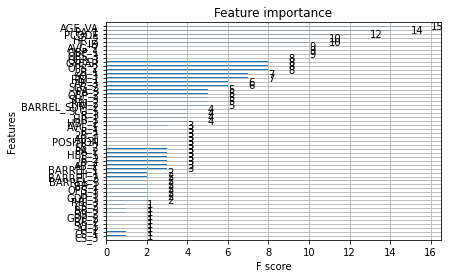

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(xgb_reg, ax=ax)